In [1]:
import netCDF4 as nc
import numpy as np

sr = nc.Dataset("searise.nc")
sr


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Comments: Antarctica master data set (with ice shelves)
    Conventions: CF-1.3
    History: Created at the University of Montana (2009)
    Title: Antarctica
    dimensions(sizes): sealeveltimes(406), temptimes(4051), time(1), y1(1200), x1(1200)
    variables(dimensions): float32 sealeveltimes(sealeveltimes), float32 usrf(time, y1, x1), float32 topg(time, y1, x1), float32 temptimes(temptimes), float32 presprcp(time, y1, x1), float32 lon(time, y1, x1), |S1 mapping(), float32 melt(time, y1, x1), float32 sealevel_time_series(sealeveltimes), float32 surfvelmag(time, y1, x1), float32 lat(time, y1, x1), float32 thk(time, y1, x1), float32 balvelmag(time, y1, x1), float32 bheatflx_shapiro(time, y1, x1), float32 time(time), float32 y1(y1), int32 thkmask(time, y1, x1), float32 temp_time_series(temptimes), float32 x1(x1), float32 bheatflx_fox(time, y1, x1), float32 presartm(time, y1, x1), float32

In [3]:
#You can look at the variables in the file like this:\
sr['y1']

<class 'netCDF4._netCDF4.Variable'>
float32 y1(y1)
    long_name: Cartesian y-coordinate
    standard_name: projection_y_coordinate
    units: meters
unlimited dimensions: 
current shape = (1200,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [2]:
#You can transform it into a useable array like this:
sr_y = np.array(sr['y1'])
sr_y

array([-2800000., -2795000., -2790000., ...,  3185000.,  3190000.,
        3195000.], dtype=float32)

In [4]:
sr['usrf']

<class 'netCDF4._netCDF4.Variable'>
float32 usrf(time, y1, x1)
    Source: (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L., J.L. Gomez-Dans and J.A. Griggs (2009), "A New 1 km Digital Elevation Model of the Antarctic Derived From Combined Satellite Radar and Laser Data - Part 1: Data and Methods"; The Cryosphere, 3, 101-111, 2009.  [2] Griggs, J.A. and J.L. Bamber (2009), "A New 1 km Digital Elevation Model of Antarctica Derived From Combined Radar and Laser Data - Part 2: Validation and Error Estimates"; The Cryosphere, 3, 113-123 2009.
    long_name: Ice Upper Surface Elevation
    standard_name: surface_altitude
    units: meters
unlimited dimensions: 
current shape = (1, 1200, 1200)
filling on, default _FillValue of 9.969209968386869e+36 used

In [9]:
#Make an array of usrf and check the shape
usrf = np.array(sr['usrf'])
usrf.shape

(1, 1200, 1200)

In [7]:
usrf[0].shape

(1200, 1200)

In [11]:
#index
new_array = usrf[0]

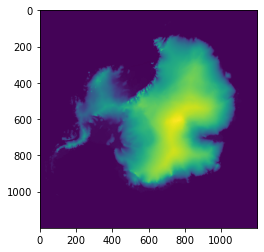

In [12]:
#plot the surface data
import matplotlib.pyplot as plt

plt.imshow(new_array)

In [14]:
import xarray as xr
sr_xr = xr.open_dataset("searise.nc",decode_times=False)
sr_xr 

<xarray.Dataset>
Dimensions:               (sealeveltimes: 406, time: 1, y1: 1200, x1: 1200, temptimes: 4051)
Coordinates:
  * sealeveltimes         (sealeveltimes) float32 0.0 1e+03 ... 4.05e+05
  * temptimes             (temptimes) float32 0.0 100.0 ... 4.049e+05 4.05e+05
  * time                  (time) float32 0.0
  * y1                    (y1) float32 -2.8e+06 -2.795e+06 ... 3.195e+06
  * x1                    (x1) float32 -2.8e+06 -2.795e+06 ... 3.195e+06
Data variables: (12/18)
    usrf                  (time, y1, x1) float32 ...
    topg                  (time, y1, x1) float32 ...
    presprcp              (time, y1, x1) float32 ...
    lon                   (time, y1, x1) float32 ...
    mapping               |S1 ...
    melt                  (time, y1, x1) float32 ...
    ...                    ...
    thkmask               (time, y1, x1) int32 ...
    temp_time_series      (temptimes) float32 ...
    bheatflx_fox          (time, y1, x1) float32 ...
    presartm              (time, y1, x1) float32 ...
    surfvelx              (time, y1, x1) float32 ...
    surfvely              (time, y1, x1) float32 ...
Attributes:
    Comments:     Antarctica master data set (with ice shelves)
    Conventions:  CF-1.3
    History:      Created at the University of Montana (2009)
    Title:        Antarctica

In [15]:
#Index into 'usrf' 
usrf_xr = sr_xr['usrf']
usrf_xr

<xarray.DataArray 'usrf' (time: 1, y1: 1200, x1: 1200)>
[1440000 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.0
  * y1       (y1) float32 -2.8e+06 -2.795e+06 -2.79e+06 ... 3.19e+06 3.195e+06
  * x1       (x1) float32 -2.8e+06 -2.795e+06 -2.79e+06 ... 3.19e+06 3.195e+06
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

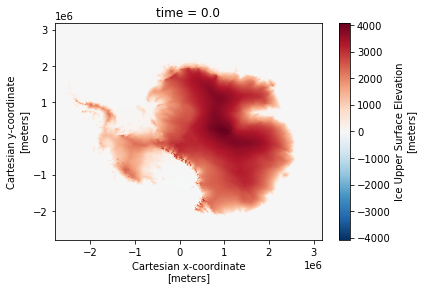

In [16]:
#plot it
usrf_xr.plot()

In [17]:
#Select a specific coordinate and get the value
usrf_xr.sel(y1=-2800000, x1=-2800000)


<xarray.DataArray 'usrf' (time: 1)>
array([0.], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
    y1       float32 -2.8e+06
    x1       float32 -2.8e+06
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

In [18]:
#Select a index and get the value
usrf_xr.isel(y1=500, x1=500)

<xarray.DataArray 'usrf' (time: 1)>
array([2749.5881], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
    y1       float32 -3e+05
    x1       float32 -3e+05
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

In [19]:
#what is the y1 value?
usrf_xr.isel(y1=500, x1=500)['y1']


<xarray.DataArray 'y1' ()>
array(-300000., dtype=float32)
Coordinates:
    y1       float32 -3e+05
    x1       float32 -3e+05
Attributes:
    long_name:      Cartesian y-coordinate
    standard_name:  projection_y_coordinate
    units:          meters

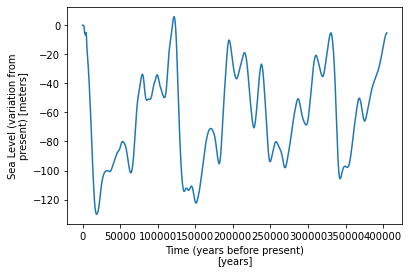

In [20]:
sea_level = sr_xr['sealevel_time_series']
sea_level.plot()

In [21]:
sea_level

<xarray.DataArray 'sealevel_time_series' (sealeveltimes: 406)>
array([ 0.     ,  0.     , -0.73143, ..., -7.41879, -5.85144, -5.29416],
      dtype=float32)
Coordinates:
  * sealeveltimes  (sealeveltimes) float32 0.0 1e+03 2e+03 ... 4.04e+05 4.05e+05
Attributes:
    Source:         Imbrie, John D., A. McIntyre (2006), SPECMAP time scale d...
    long_name:      Sea Level (variation from present)
    units:          meters
    standard_name:  global_average_sea_level_change

In [33]:
sr_xr['sealevel_time_series']

<xarray.DataArray 'sealevel_time_series' (sealeveltimes: 406)>
array([ 0.     ,  0.     , -0.73143, ..., -7.41879, -5.85144, -5.29416],
      dtype=float32)
Coordinates:
  * sealeveltimes  (sealeveltimes) float32 0.0 1e+03 2e+03 ... 4.04e+05 4.05e+05
Attributes:
    Source:         Imbrie, John D., A. McIntyre (2006), SPECMAP time scale d...
    long_name:      Sea Level (variation from present)
    units:          meters
    standard_name:  global_average_sea_level_change

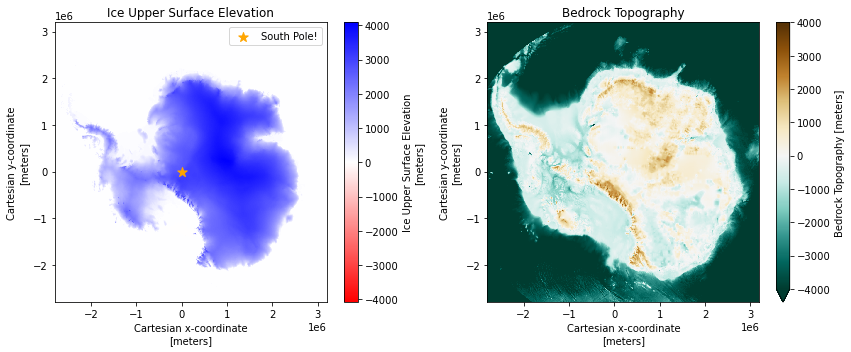

In [75]:
#Figure out how to plot usrf and topg on the same figure

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

surface= sr_xr['usrf']
surface.plot(ax=ax1,cmap = 'bwr_r')

sr_xr['topg'].plot(ax=ax2, cmap = 'BrBG_r',vmax=4000)

ax1.set_title(sr_xr['usrf'].long_name)
ax2.set_title(sr_xr['topg'].long_name)

ax1.scatter(0,0,label='South Pole!',marker='*',color='orange',s=100)
ax1.legend()


plt.tight_layout()